# Assignment Week 2 
Answer each question completely. Include your code and summarize what you see in a brief narrative.

### Charting:
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('car_prices.csv', low_memory=False)

# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- vin: unique identifier of the car. 
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- seller: who sold the car.  
- mmr: estimated wholesale price of the car.  
- sellingprice: actual sales price of the car.  
- saledate: date and time of the sale. 

# Question 1. Determine the number of missing values in each column.

In [3]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

<AxesSubplot:xlabel='index'>

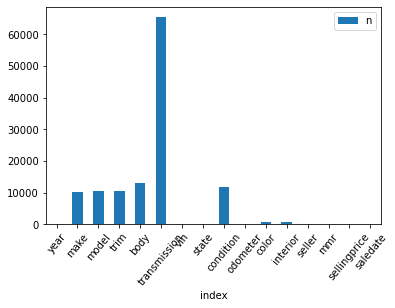

In [5]:
df.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=50)

Sample narrative description.

# Question 2. Check the data types. Which columns are coded to the incorrect type? If any, correct them.

In [6]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

In [10]:
#Converting columns to best possible dtypes
#personally I felt that condition should be float


df.convert_dtypes(infer_objects=True, convert_string=True, convert_integer=True, convert_boolean=True, convert_floating=True)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,<NA>,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [13]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

Sample narrative description.

# Question 3. Analyze the 'make' column. Comment on what you observe. Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 
Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [14]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nan',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 's

In [108]:
df['make'].value_counts()

Ford         66362
Nissan       40797
Chevrolet    34476
Toyota       24118
Dodge        17480
             ...  
suzuki           2
chrysler         1
mercedes         1
airstream        1
nissan           1
Name: make, Length: 62, dtype: int64

# The above code gets all the unique values or elements from the column 'Make'. To get it more accurate and into detail let's get the count of unique values and plot them.

In [18]:
df1=df['make'].value_counts()
df1.head()

Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Name: make, dtype: int64

<AxesSubplot:xlabel='make'>

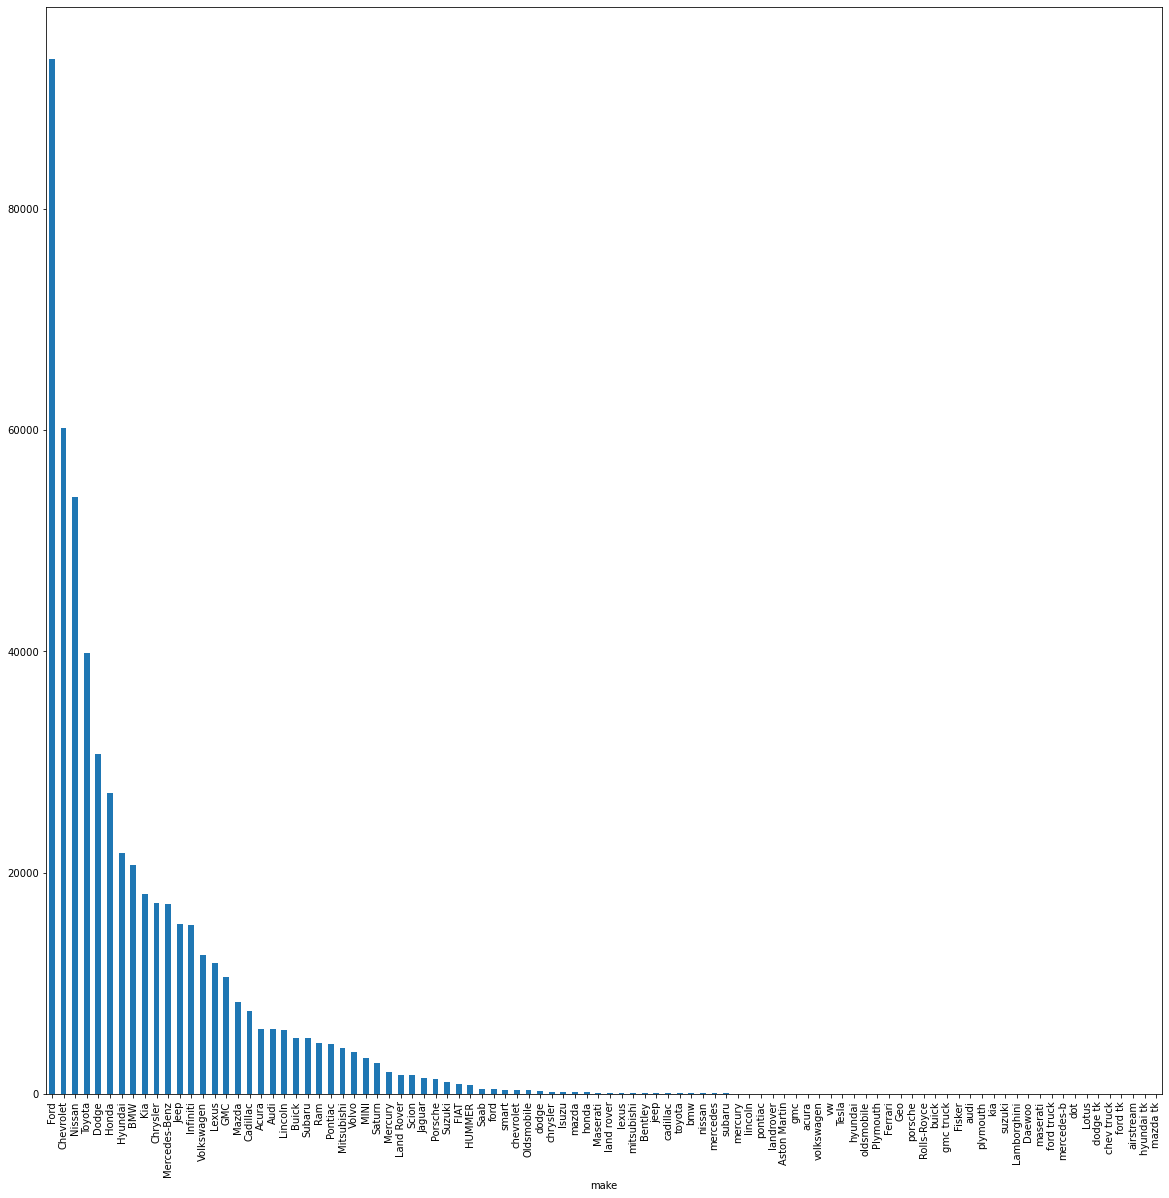

In [25]:
plt.rcParams["figure.figsize"] = [20, 20]
df.value_counts(df['make']).plot.bar()

Sample narrative description.

# Question 4. Analyze the relationship between the wholeprice 'mmr' and the sales price. What is the overall correlation? What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

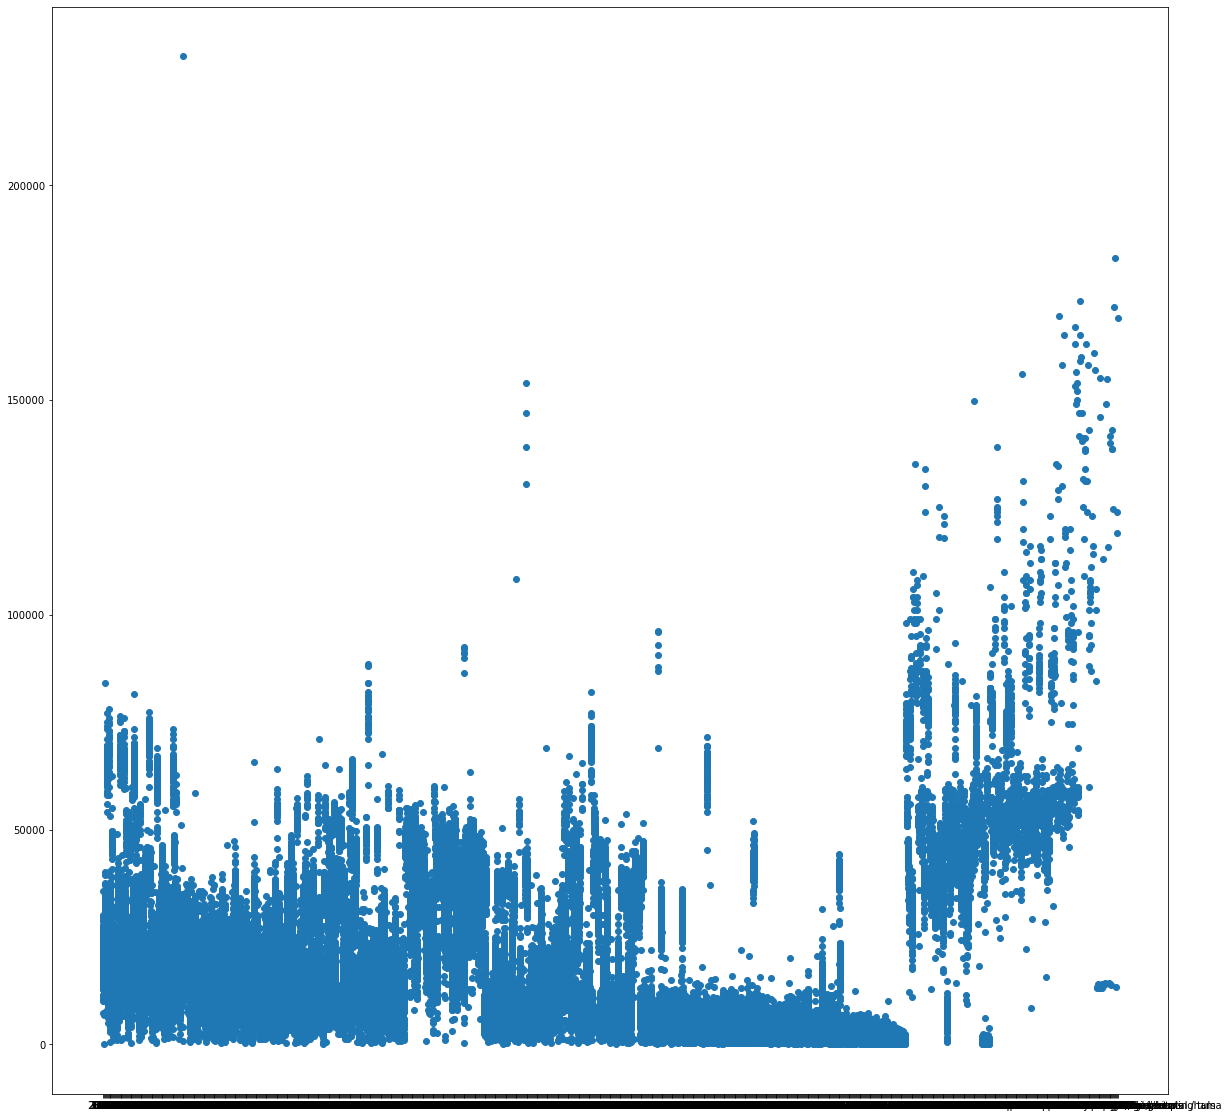

In [36]:
data1= df['mmr']
data2= df['sellingprice']
plt.scatter(data1, data2)

In [41]:
df[['mmr','sellingprice']].corr()

,sellingprice
sellingprice,1.0


In [45]:
df['mmrnumeric'] = pd.to_numeric(df['mmr'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
 16  mmrnumeric    558811 non-null  float64
dtypes: float64(2), int64(2), object(13)
memory usage

In [47]:
df[['mmrnumeric','sellingprice']].corr()

,mmrnumeric,sellingprice
mmrnumeric,1.000000,0.983634
sellingprice,0.983634,1.000000


<AxesSubplot:xlabel='mmrnumeric', ylabel='sellingprice'>

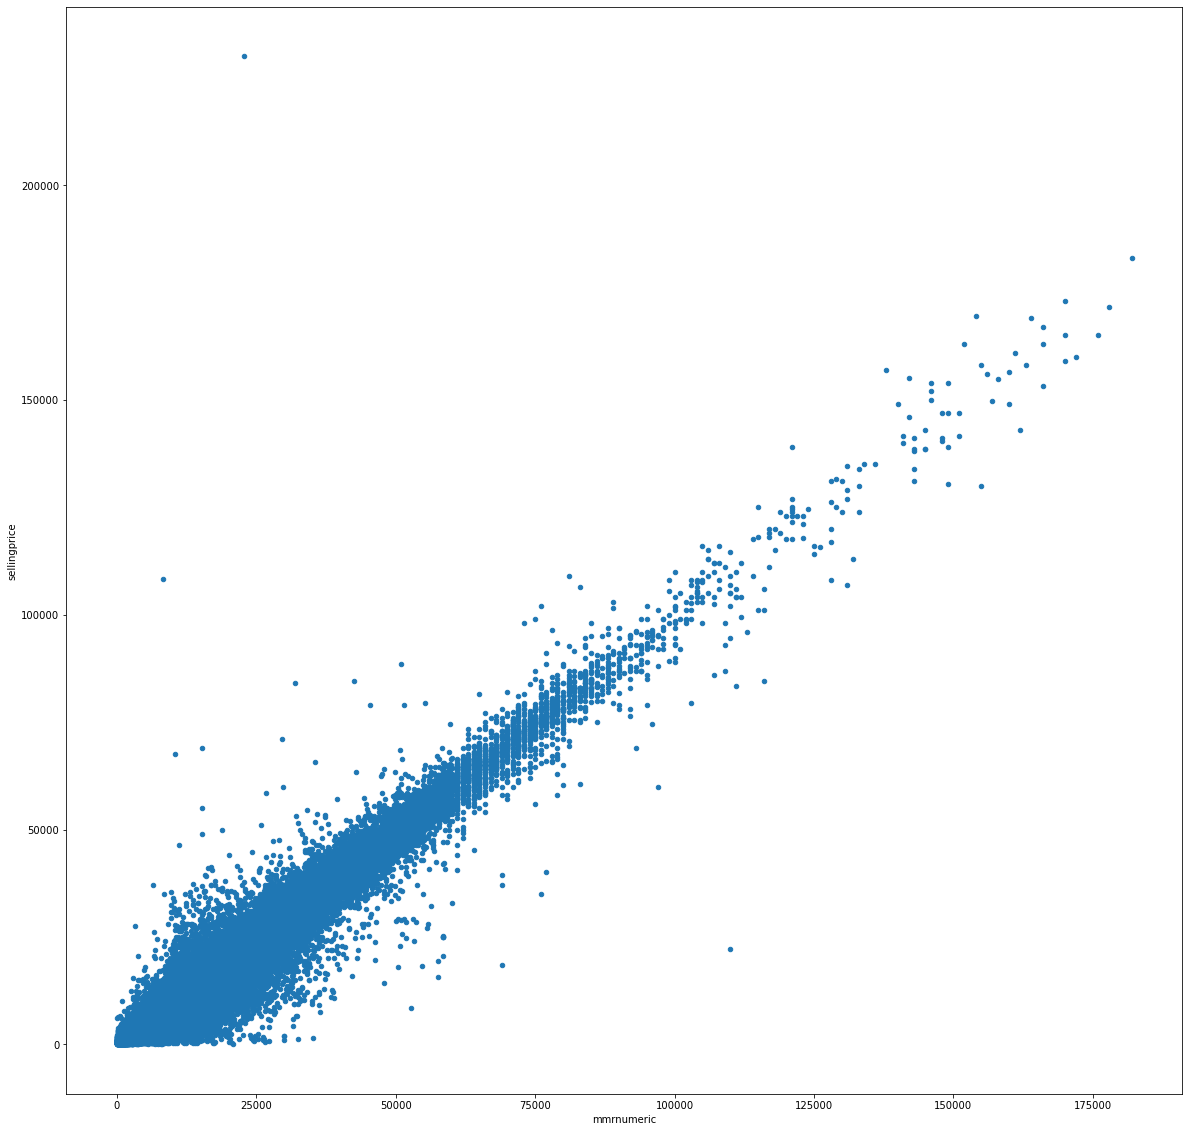

In [49]:
df[['mmrnumeric','sellingprice']].plot.scatter(x='mmrnumeric', y='sellingprice', alpha=1)

Sample narrative description.

# Question 5. How does the distribution of sales price vary by make for cars made between 2010-2015? Use the 10 most common makes (your cleaned version of this column). Create a graph that answers this question.

In [86]:

df.groupby('year').count().sort_index()

,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,mmrnumeric
year,,,,,,,,,,,,,,,,
2011,48216,48216,48210,48112,42143,48548,48548,48049,48546,48485,48485,48548,48548,48548,48548,48548
2012,101380,101380,101377,101238,88749,102315,102315,101837,102313,102154,102154,102315,102315,102315,102315,102315
2013,98114,98114,98112,98106,87951,98168,98168,97780,98167,98022,98022,98168,98168,98168,98168,98168
2014,80574,80503,80574,80474,70411,81070,81070,80730,81067,80889,80889,81070,81070,81070,81070,81070
2015,9223,9196,9223,9220,8274,9433,9437,9410,9437,9413,9413,9437,9437,9437,9437,9411


In [87]:


df.groupby('year')['sellingprice'].count().sort_index()

year
2011     48548
2012    102315
2013     98168
2014     81070
2015      9437
Name: sellingprice, dtype: int64

In [83]:
dfLong = df.pivot_table(index='make', columns='year', values='sellingprice')
print(dfLong)

year                   2011           2012           2013           2014  \
make                                                                       
Acura          20366.608392   20423.527851   23171.160410   31890.163934   
Aston Martin   98750.000000            NaN            NaN            NaN   
Audi           23389.243499   27957.875000   30999.505650   41370.022124   
BMW            21949.596626   30177.933732   33803.756260   43044.698703   
Bentley       113500.000000  110916.666667  135840.909091  154000.000000   
...                     ...            ...            ...            ...   
smart           5614.285714    6200.000000    7475.000000    8620.000000   
suzuki                  NaN    8850.000000            NaN            NaN   
toyota         10050.000000            NaN            NaN            NaN   
volkswagen      6900.000000            NaN   21400.000000   15066.666667   
vw              9466.666667            NaN   20050.000000   20288.888889   

year       

Text(159.0, 0.5, '')

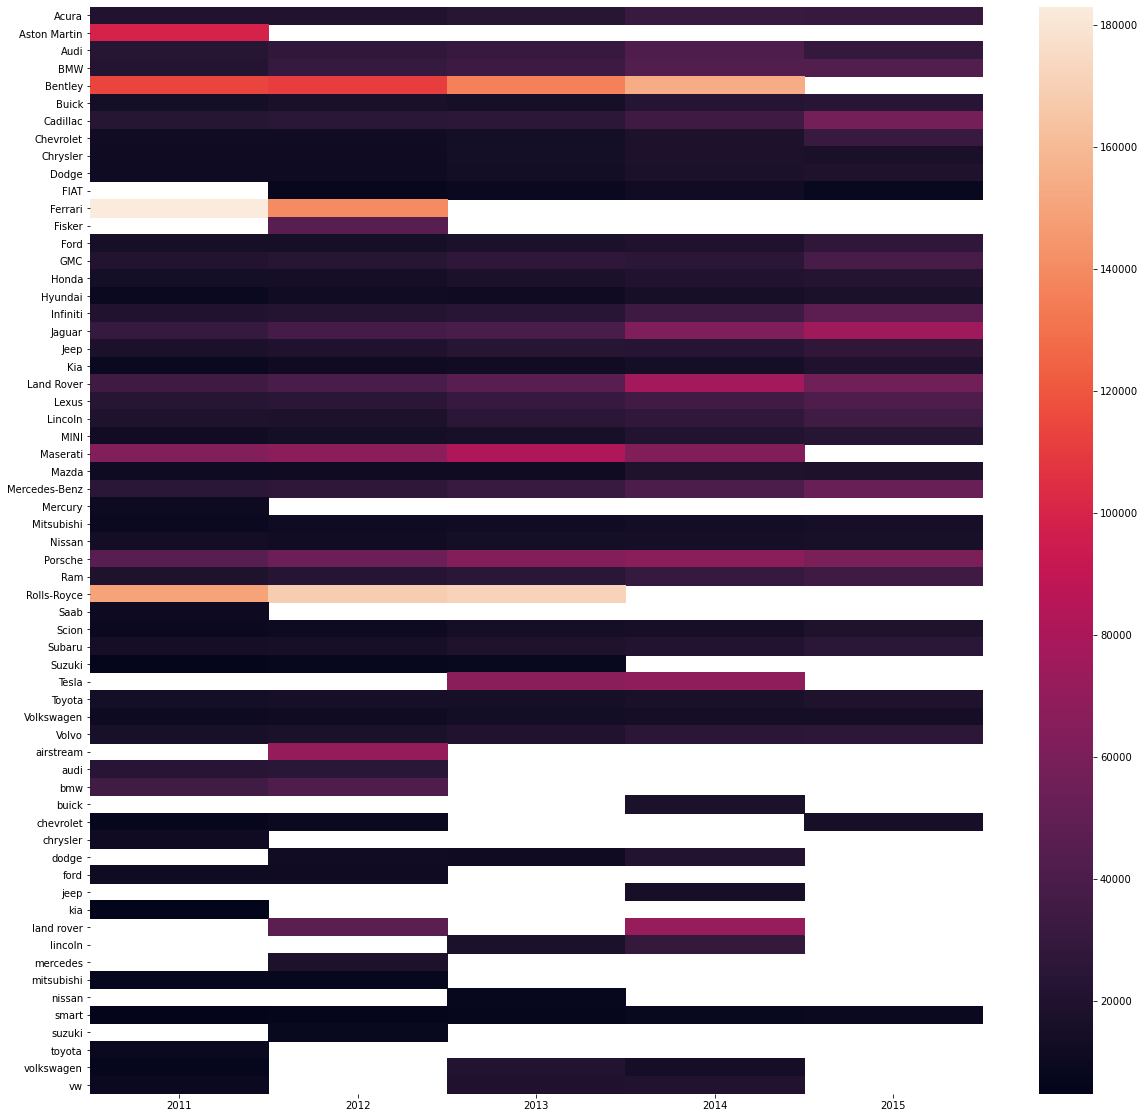

In [89]:
sns.heatmap(dfLong)
plt.xlabel('')
plt.ylabel('')

<AxesSubplot:title={'center':'sellingprice'}, xlabel='make'>

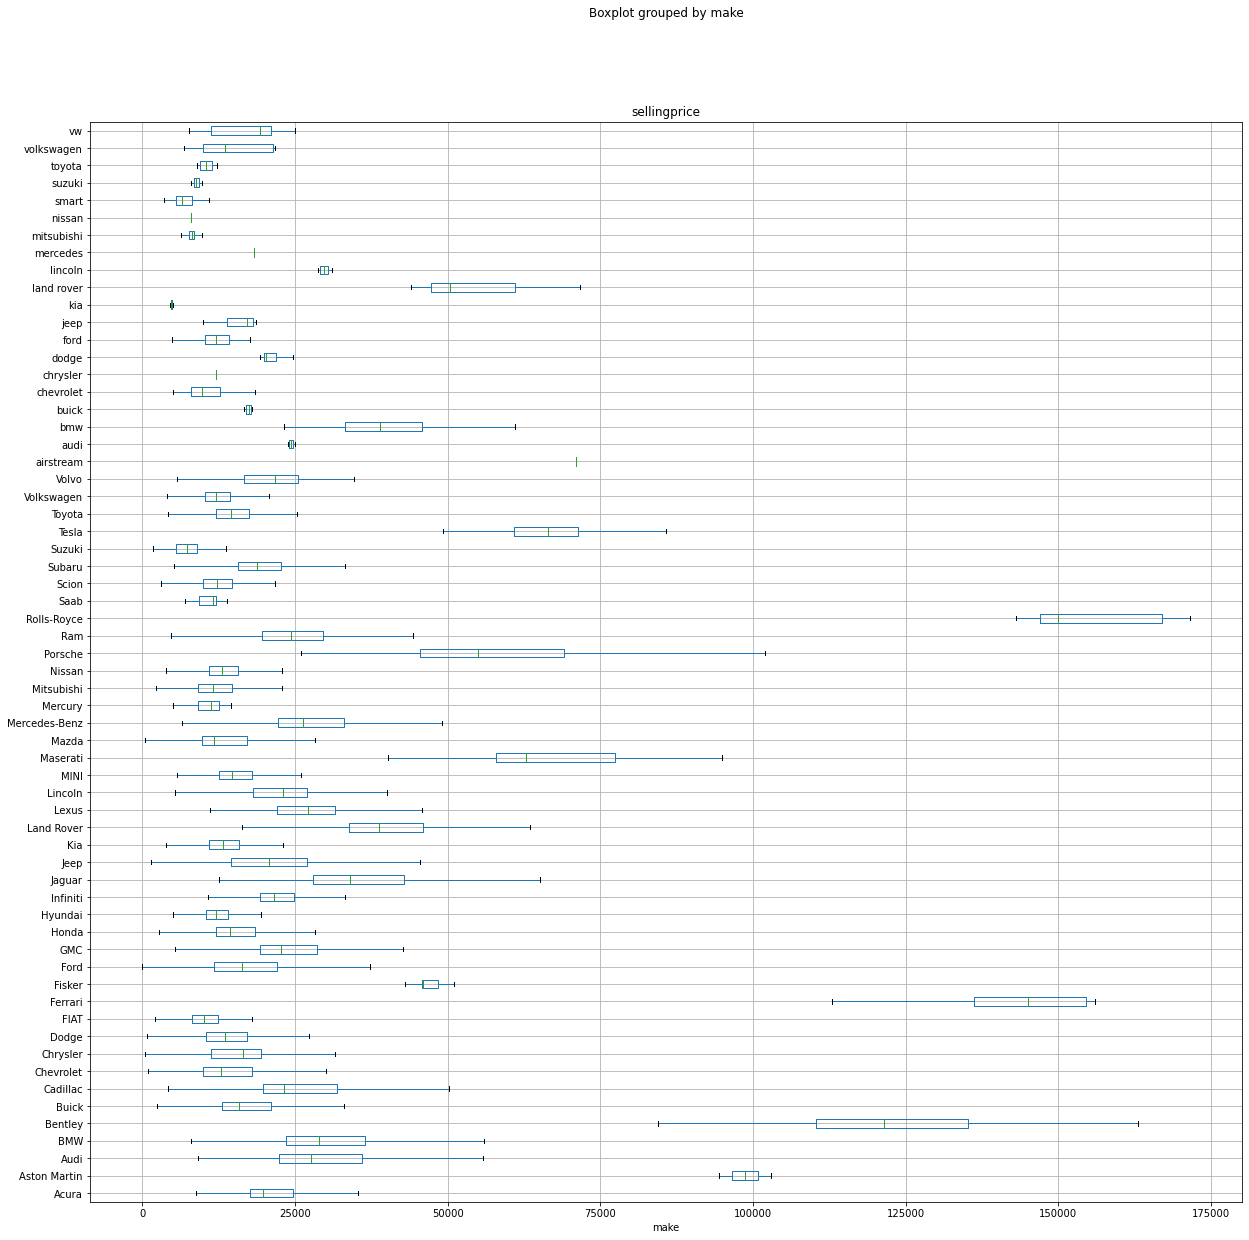

In [96]:
df.boxplot(column='sellingprice', by='make', vert=False, showfliers=False)

In [99]:
df['make'].value_counts().sort_values(ascending=False)

Ford         66362
Nissan       40797
Chevrolet    34476
Toyota       24118
Dodge        17480
             ...  
suzuki           2
chrysler         1
mercedes         1
airstream        1
nissan           1
Name: make, Length: 62, dtype: int64

In [118]:

dfyears= df[(df['year']>=2010 & (df['year']<=2015))]
dfyears

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,mmrnumeric
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),20500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),20800.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),31900.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),27500.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),66000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),35300.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),30200.0
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),29800.0
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),15100.0


In [119]:
dfLong1 = dfyears.pivot_table(index='year', columns='make', values='sellingprice')
dfLong1

make,Acura,Aston Martin,Audi,BMW,Bentley,Buick,Cadillac,Chevrolet,Chrysler,Dodge,...,land rover,lincoln,mercedes,mitsubishi,nissan,smart,suzuki,toyota,volkswagen,vw
year,,,,,,,,,,,,,,,,,,,,,
2011,20366.608392,98750.0,23389.243499,21949.596626,113500.000000,14242.945607,23147.592246,12713.266679,11992.407407,11313.054863,...,NaN,NaN,NaN,7900.000000,NaN,5614.285714,NaN,10050.0,6900.000000,9466.666667
2012,20423.527851,NaN,27957.875000,30177.933732,110916.666667,17085.525790,24505.676118,13062.404772,12224.161834,11677.206745,...,47200.0,NaN,18300.0,7966.025641,NaN,6200.000000,8850.0,NaN,NaN,NaN
2013,23171.160410,NaN,30999.505650,33803.756260,135840.909091,15505.167279,26259.611111,14322.272377,13986.581686,13110.010420,...,NaN,17750.000000,NaN,NaN,8000.0,7475.000000,NaN,NaN,21400.000000,20050.000000
2014,31890.163934,NaN,41370.022124,43044.698703,154000.000000,22375.108225,34497.460784,18372.808322,18320.098118,17593.765967,...,71600.0,29529.411765,NaN,NaN,NaN,8620.000000,NaN,NaN,15066.666667,20288.888889
2015,31159.090909,NaN,29541.666667,42937.234043,NaN,23759.426230,58142.741935,31763.397213,16951.221996,19175.203252,...,NaN,NaN,NaN,NaN,NaN,9166.666667,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year'>

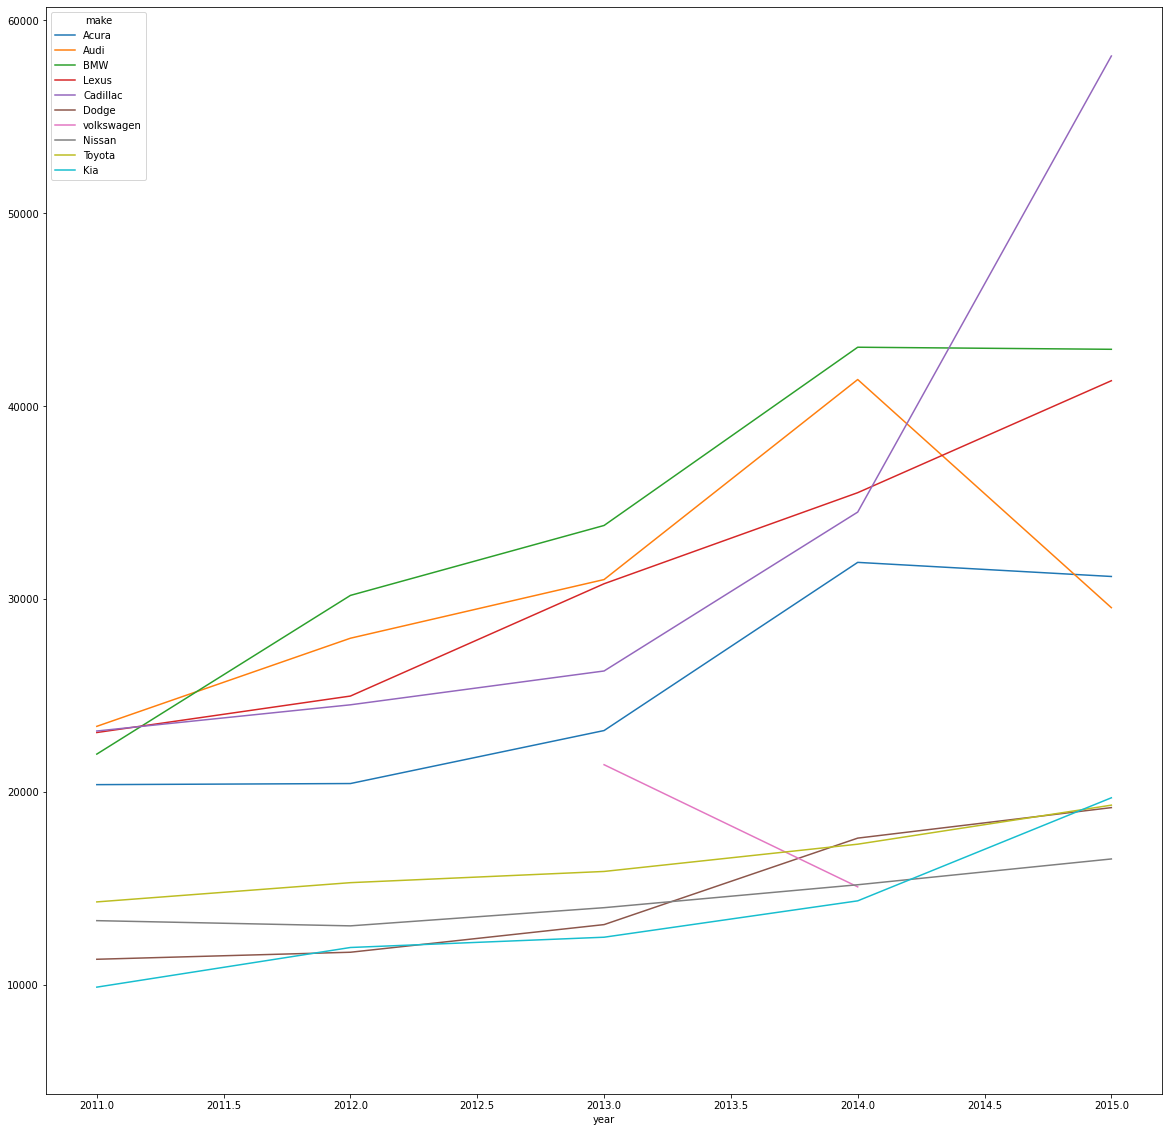

In [117]:
dfLong1.loc[:,['Acura','Audi','BMW','Lexus','Cadillac','Dodge','volkswagen','Nissan','Toyota','Kia']].plot(alpha=1)

Sample narrative description.